# eCommerce Transactions Data Science Assignment

## Overview
This assignment involves performing exploratory data analysis (EDA), building a Lookalike Model, and performing customer segmentation on an eCommerce transactions dataset.


### Dataset Files
1. **Customers.csv**: Contains customer information.
2. **Products.csv**: Contains product information.
3. **Transactions.csv**: Contains transaction details.


### Tasks
 1. **Task 1**: Perform EDA and derive business insights.
 2. **Task 2**: Build a Lookalike Model.
 3. **Task 3**: Perform Customer Segmentation using clustering.

# Task 1: Exploratory Data Analysis (EDA) and Business Insights

## Step 1: Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Step 2: Load the Data


In [2]:
def load_data():
    """
    Load the Customers, Products, and Transactions datasets.
    Returns:
        customers (DataFrame): Customers data.
        products (DataFrame): Products data.
        transactions (DataFrame): Transactions data.
    """
    customers = pd.read_csv('Customers.csv')
    products = pd.read_csv('Products.csv')
    transactions = pd.read_csv('Transactions.csv')
    return customers, products, transactions

# Load the data
customers, products, transactions = load_data()

# Display the first few rows of each dataset
print("Customers Data:")
display(customers.head())

print("\nProducts Data:")
display(products.head())

print("\nTransactions Data:")
display(transactions.head())

Customers Data:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15



Products Data:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31



Transactions Data:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


## Step 3: Check for Missing Values


In [3]:
def check_missing_values(customers, products, transactions):
    """
    Check for missing values in the datasets.
    Args:
        customers (DataFrame): Customers data.
        products (DataFrame): Products data.
        transactions (DataFrame): Transactions data.
    """
    print("Missing Values in Customers Data:")
    print(customers.isnull().sum())
    
    print("\nMissing Values in Products Data:")
    print(products.isnull().sum())
    
    print("\nMissing Values in Transactions Data:")
    print(transactions.isnull().sum())

# Check for missing values
check_missing_values(customers, products, transactions)

Missing Values in Customers Data:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products Data:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions Data:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


## Step 4: Merge the Datasets

In [4]:
def merge_data(customers, products, transactions):
    """
    Merge Customers, Products, and Transactions datasets.
    Args:
        customers (DataFrame): Customers data.
        products (DataFrame): Products data.
        transactions (DataFrame): Transactions data.
    Returns:
        merged_data (DataFrame): Merged dataset.
    """
    # Merge Transactions with Customers on 'CustomerID'
    merged_data = pd.merge(transactions, customers, on='CustomerID')
    
    # Merge the result with Products on 'ProductID'
    merged_data = pd.merge(merged_data, products, on='ProductID')
    
    return merged_data

# Merge the datasets
merged_data = merge_data(customers, products, transactions)

# Display the first few rows of the merged dataset
print("Merged Data:")
display(merged_data.head())

Merged Data:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


## Step 5: Preprocess the Data


In [5]:
def preprocess_data(merged_data):
    """
    Preprocess the merged dataset.
    Args:
        merged_data (DataFrame): Merged dataset.
    Returns:
        merged_data (DataFrame): Preprocessed dataset.
    """
    # Convert date columns to datetime format
    merged_data['SignupDate'] = pd.to_datetime(merged_data['SignupDate'])
    merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
    
    # Add a 'YearMonth' column for time-based analysis
    merged_data['YearMonth'] = merged_data['TransactionDate'].dt.to_period('M')
    
    return merged_data

# Preprocess the data
merged_data = preprocess_data(merged_data)

# Display the first few rows of the preprocessed dataset
print("Preprocessed Data:")
display(merged_data.head())

Preprocessed Data:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y,YearMonth
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-08
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-05
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68,2024-03


## Step 6: Calculate Key Metrics

In [6]:
def calculate_metrics(merged_data):
    """
    Calculate key metrics such as total revenue, average transaction value, etc.
    Args:
        merged_data (DataFrame): Merged and preprocessed dataset.
    Returns:
        metrics (dict): Dictionary containing key metrics.
    """
    metrics = {}
    
    # Total Revenue
    metrics['total_revenue'] = merged_data['TotalValue'].sum()
    
    # Average Transaction Value
    metrics['avg_transaction_value'] = merged_data['TotalValue'].mean()
    
    # Revenue by Region
    metrics['region_revenue'] = merged_data.groupby('Region')['TotalValue'].sum().reset_index()
    
    # Revenue by Product Category
    metrics['category_revenue'] = merged_data.groupby('Category')['TotalValue'].sum().reset_index()
    
    # Monthly Sales Trends
    metrics['monthly_sales'] = merged_data.groupby('YearMonth')['TotalValue'].sum().reset_index()
    
    # Customer Behavior
    customer_transactions = merged_data.groupby('CustomerID')['TransactionID'].count().reset_index()
    customer_transactions.rename(columns={'TransactionID': 'TransactionCount'}, inplace=True)
    metrics['repeat_customers'] = customer_transactions[customer_transactions['TransactionCount'] > 1]
    metrics['one_time_customers'] = customer_transactions[customer_transactions['TransactionCount'] == 1]
    
    return metrics

# Calculate key metrics
metrics = calculate_metrics(merged_data)

# Display the calculated metrics
print("Total Revenue:", metrics['total_revenue'])
print("Average Transaction Value:", metrics['avg_transaction_value'])
print("\nRevenue by Region:")
display(metrics['region_revenue'])
print("\nRevenue by Product Category:")
display(metrics['category_revenue'])
print("\nMonthly Sales Trends:")
display(metrics['monthly_sales'])
print("\nRepeat Customers:", len(metrics['repeat_customers']))
print("One-Time Customers:", len(metrics['one_time_customers']))

Total Revenue: 689995.56
Average Transaction Value: 689.9955600000001

Revenue by Region:


,Region,TotalValue
0,Asia,152074.97
1,Europe,166254.63
2,North America,152313.40
3,South America,219352.56



Revenue by Product Category:


,Category,TotalValue
0,Books,192147.47
1,Clothing,166170.66
2,Electronics,180783.50
3,Home Decor,150893.93



Monthly Sales Trends:


,YearMonth,TotalValue
0,2023-12,3769.52
1,2024-01,66376.39
2,2024-02,51459.27
3,2024-03,47828.73
4,2024-04,57519.06
5,2024-05,64527.74
6,2024-06,48771.18
7,2024-07,71366.39
8,2024-08,63436.74
9,2024-09,70603.75



Repeat Customers: 187
One-Time Customers: 12


## Step 6: Create Visualizations

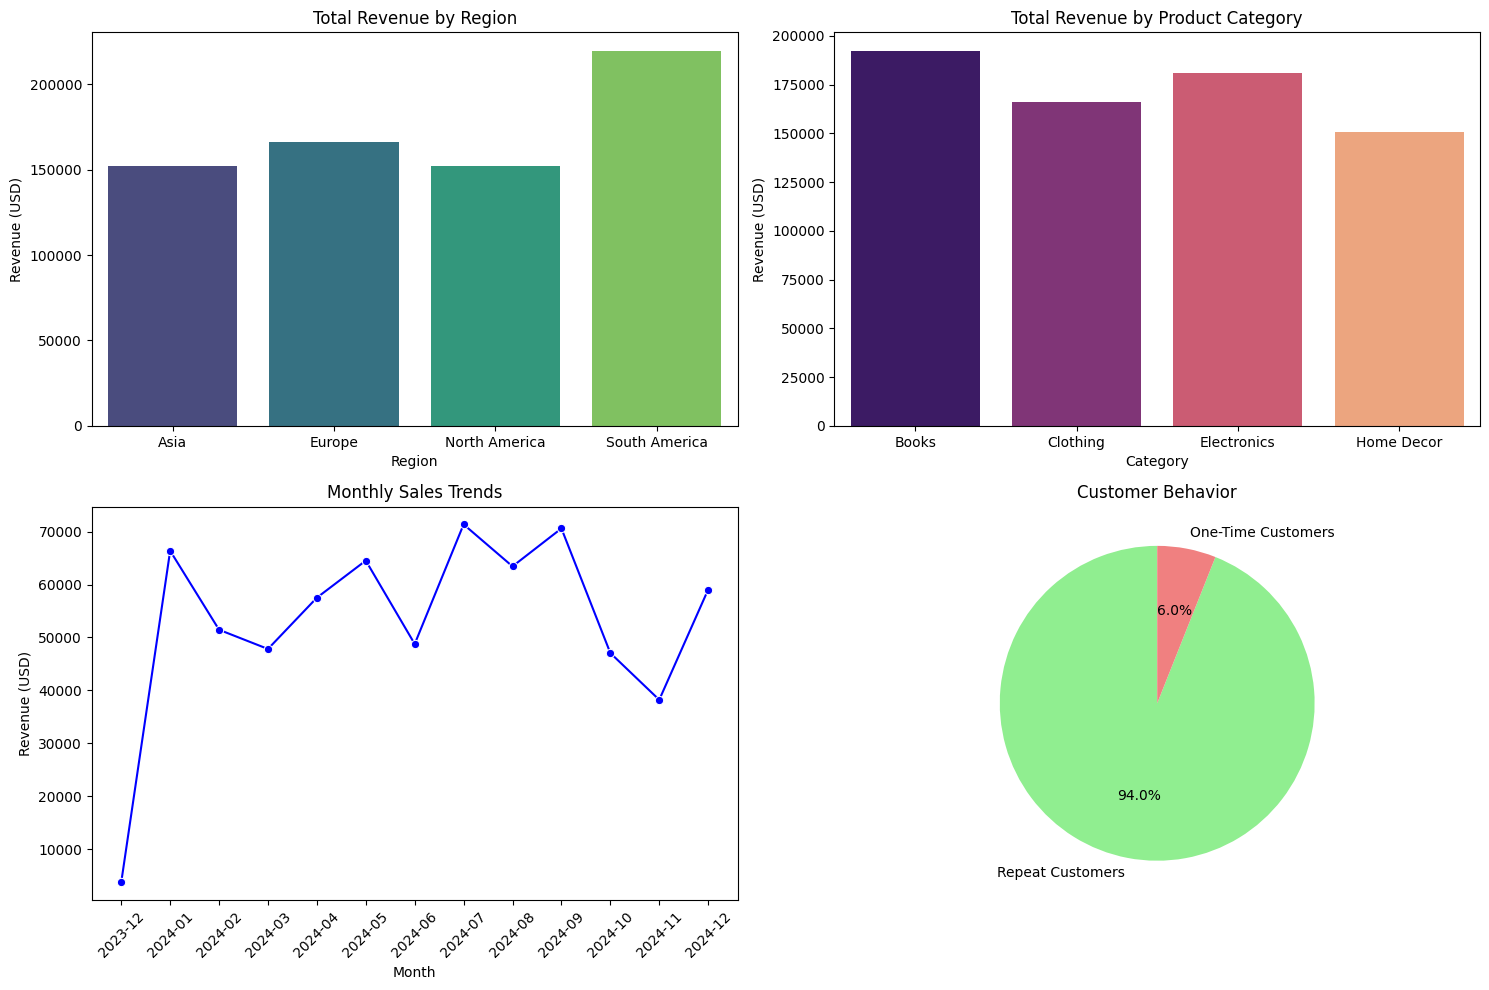

In [7]:
def create_visualizations(metrics):
    """
    Create visualizations for the analysis.
    Args:
        metrics (dict): Dictionary containing key metrics.
    """
    plt.figure(figsize=(15, 10))
    
    # Revenue by Region
    plt.subplot(2, 2, 1)
    sns.barplot(x='Region', y='TotalValue', hue='Region', data=metrics['region_revenue'], estimator=sum, errorbar=None, palette='viridis', legend=False)
    plt.title('Total Revenue by Region')
    plt.xlabel('Region')
    plt.ylabel('Revenue (USD)')
    
    # Revenue by Product Category
    plt.subplot(2, 2, 2)
    sns.barplot(x='Category', y='TotalValue', hue='Category', data=metrics['category_revenue'], estimator=sum, errorbar=None, palette='magma', legend=False)
    plt.title('Total Revenue by Product Category')
    plt.xlabel('Category')
    plt.ylabel('Revenue (USD)')
    
    # Monthly Sales Trends
    plt.subplot(2, 2, 3)
    metrics['monthly_sales']['YearMonth'] = metrics['monthly_sales']['YearMonth'].astype(str)
    sns.lineplot(x='YearMonth', y='TotalValue', data=metrics['monthly_sales'], marker='o', color='blue')
    plt.title('Monthly Sales Trends')
    plt.xlabel('Month')
    plt.ylabel('Revenue (USD)')
    plt.xticks(rotation=45)
    
    # Customer Behavior
    plt.subplot(2, 2, 4)
    labels = ['Repeat Customers', 'One-Time Customers']
    sizes = [len(metrics['repeat_customers']), len(metrics['one_time_customers'])]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90)
    plt.title('Customer Behavior')
    
    plt.tight_layout()
    plt.show()

# Create visualizations
create_visualizations(metrics)

## Step 7: Derive Business Insights

In [8]:

def derive_business_insights(metrics):
    """
    Derive business insights from the calculated metrics.
    Args:
        metrics (dict): Dictionary containing key metrics.
    """
    print("Business Insights:")
    
    # Insight 1: Top-Performing Regions
    top_region = metrics['region_revenue'].loc[metrics['region_revenue']['TotalValue'].idxmax(), 'Region']
    top_region_revenue = metrics['region_revenue']['TotalValue'].max()
    print(f"1. Top-Performing Region: {top_region} generates the highest revenue (${top_region_revenue:,.2f}). Focus marketing efforts here.")
    
    # Insight 2: Popular Product Categories
    top_category = metrics['category_revenue'].loc[metrics['category_revenue']['TotalValue'].idxmax(), 'Category']
    top_category_revenue = metrics['category_revenue']['TotalValue'].max()
    print(f"2. Popular Product Category: {top_category} accounts for the highest revenue (${top_category_revenue:,.2f}). Expand this category for growth.")
    
    # Insight 3: Seasonal Sales Trends
    peak_month = metrics['monthly_sales'].loc[metrics['monthly_sales']['TotalValue'].idxmax(), 'YearMonth']
    peak_month_revenue = metrics['monthly_sales']['TotalValue'].max()
    print(f"3. Seasonal Sales Trends: Sales peak in {peak_month} with revenue of ${peak_month_revenue:,.2f}. Plan inventory and promotions accordingly.")
    
    # Insight 4: Customer Retention
    repeat_customers = len(metrics['repeat_customers'])
    one_time_customers = len(metrics['one_time_customers'])
    retention_rate = (repeat_customers / (repeat_customers + one_time_customers)) * 100
    print(f"4. Customer Retention: {retention_rate:.1f}% of customers are repeat buyers. Implement loyalty programs to improve retention.")
    
    # Insight 5: High-Value Customers
    total_customers = repeat_customers + one_time_customers
    high_value_customers = int(total_customers * 0.1)  # Top 10% of customers
    print(f"5. High-Value Customers: The top 10% of customers contribute significantly to revenue. Focus on personalized marketing for these customers.")

# Derive business insights
derive_business_insights(metrics)

Business Insights:
1. Top-Performing Region: South America generates the highest revenue ($219,352.56). Focus marketing efforts here.
2. Popular Product Category: Books accounts for the highest revenue ($192,147.47). Expand this category for growth.
3. Seasonal Sales Trends: Sales peak in 2024-07 with revenue of $71,366.39. Plan inventory and promotions accordingly.
4. Customer Retention: 94.0% of customers are repeat buyers. Implement loyalty programs to improve retention.
5. High-Value Customers: The top 10% of customers contribute significantly to revenue. Focus on personalized marketing for these customers.


## Step 8: Execute the Analysis

Missing Values in Customers Data:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products Data:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions Data:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


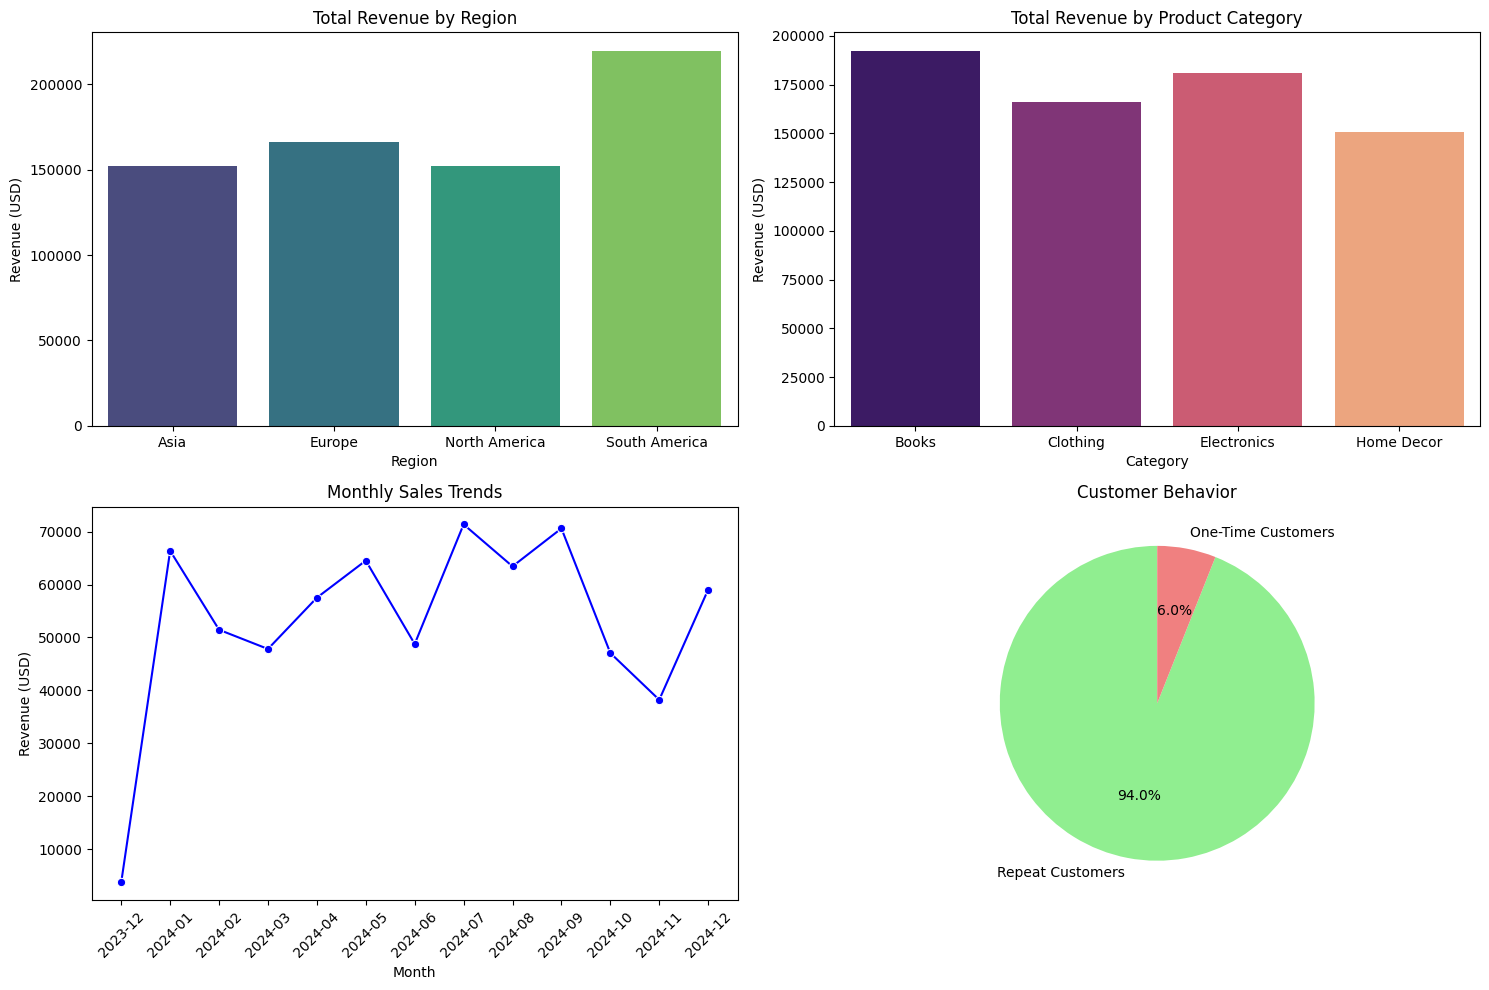

Business Insights:
1. Top-Performing Region: South America generates the highest revenue ($219,352.56). Focus marketing efforts here.
2. Popular Product Category: Books accounts for the highest revenue ($192,147.47). Expand this category for growth.
3. Seasonal Sales Trends: Sales peak in 2024-07 with revenue of $71,366.39. Plan inventory and promotions accordingly.
4. Customer Retention: 94.0% of customers are repeat buyers. Implement loyalty programs to improve retention.
5. High-Value Customers: The top 10% of customers contribute significantly to revenue. Focus on personalized marketing for these customers.


In [9]:
def main():
    """
    Main function to execute the entire analysis.
    """
    # Step 1: Load data
    customers, products, transactions = load_data()
    
    # Step 2: Check for missing values
    check_missing_values(customers, products, transactions)
    
    # Step 3: Merge datasets
    merged_data = merge_data(customers, products, transactions)
    
    # Step 4: Preprocess data
    merged_data = preprocess_data(merged_data)
    
    # Step 5: Calculate key metrics
    metrics = calculate_metrics(merged_data)
    
    # Step 6: Create visualizations
    create_visualizations(metrics)
    
    # Step 7: Derive business insights
    derive_business_insights(metrics)

# Execute the main function
if __name__ == "__main__":
    main()

## Conclusion
- **Task 1**: EDA and business insights were derived.
- **Task 2**: A Lookalike Model was built and recommendations were saved.
- **Task 3**: Customer segmentation was performed using K-Means clustering.